<a href="https://colab.research.google.com/github/atlas-github/fstep_21/blob/main/fstep_21_spreadsheet_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning

Create a random dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df

,one,two,three
a,0.717764,-1.117052,-0.014087
b,NaN,NaN,NaN
c,-0.397798,0.116215,2.205117
d,NaN,NaN,NaN
e,-0.041764,0.110192,-0.178792
f,0.978705,-0.755528,0.028349
g,NaN,NaN,NaN
h,-0.629444,-0.200072,-0.277504


Check for missing values using [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html)

In [ ]:
df.isnull()

,one,two,three
a,False,False,False
b,True,True,True
c,False,False,False
d,True,True,True
e,False,False,False
f,False,False,False
g,True,True,True
h,False,False,False


Replace NaN with a scalar value using [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
df.fillna(0)

,one,two,three
a,0.717764,-1.117052,-0.014087
b,0.000000,0.000000,0.000000
c,-0.397798,0.116215,2.205117
d,0.000000,0.000000,0.000000
e,-0.041764,0.110192,-0.178792
f,0.978705,-0.755528,0.028349
g,0.000000,0.000000,0.000000
h,-0.629444,-0.200072,-0.277504


Fill missing values using [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

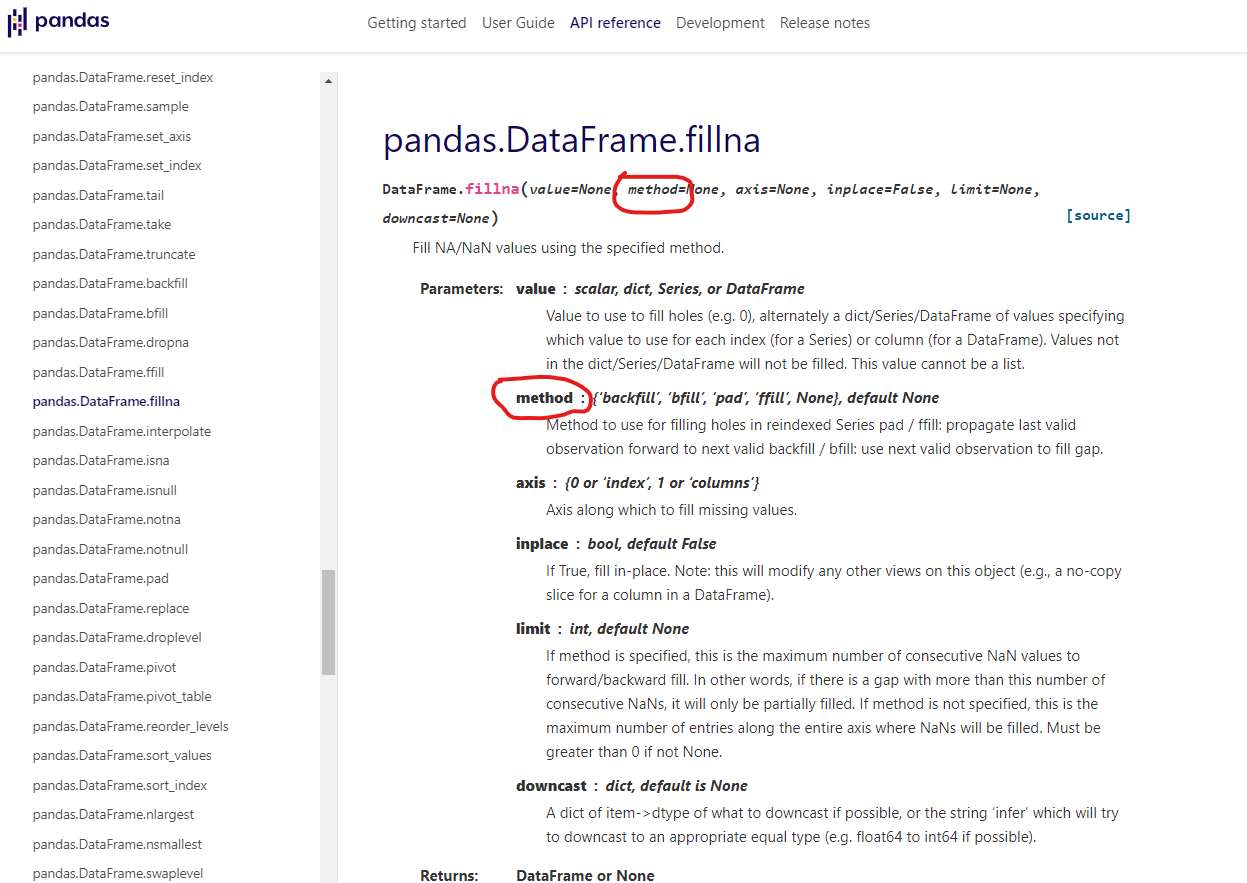

In [ ]:
df.fillna(method = "pad")

,one,two,three
a,0.717764,-1.117052,-0.014087
b,0.717764,-1.117052,-0.014087
c,-0.397798,0.116215,2.205117
d,-0.397798,0.116215,2.205117
e,-0.041764,0.110192,-0.178792
f,0.978705,-0.755528,0.028349
g,0.978705,-0.755528,0.028349
h,-0.629444,-0.200072,-0.277504


Drop missing values using [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
df.dropna()

,one,two,three
a,0.717764,-1.117052,-0.014087
c,-0.397798,0.116215,2.205117
e,-0.041764,0.110192,-0.178792
f,0.978705,-0.755528,0.028349
h,-0.629444,-0.200072,-0.277504


#Data Analysis and Summary

Get dataset - how to find positive rate?

In [ ]:
!wget https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv
!wget https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv

--2021-11-01 17:33:08--  https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41231 (40K) [text/plain]
Saving to: ‘cases_malaysia.csv’

cases_malaysia.csv  100%[===================>]  40.26K  --.-KB/s    in 0.003s  

2021-11-01 17:33:08 (14.1 MB/s) - ‘cases_malaysia.csv’ saved [41231/41231]

--2021-11-01 17:33:08--  https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
cases_malaysia = pd.read_csv("cases_malaysia.csv")
cases_malaysia.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tests_malaysia = pd.read_csv("tests_malaysia.csv")
tests_malaysia

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53
...,...,...,...
641,2021-10-26,103247,33134
642,2021-10-27,102113,32248
643,2021-10-28,92349,27749
644,2021-10-29,84734,26856


In [ ]:
cases_malaysia[["date", "cases_new"]]

,date,cases_new
0,2020-01-25,4
1,2020-01-26,0
2,2020-01-27,0
3,2020-01-28,0
4,2020-01-29,3
...,...,...
642,2021-10-28,6377
643,2021-10-29,6060
644,2021-10-30,5854
645,2021-10-31,4979


In [ ]:
df_joined = pd.concat([cases_malaysia[["date", "cases_new"]], tests_malaysia[["rtk-ag", "pcr"]]], axis = 1, join = "inner")
df_joined

,date,cases_new,rtk-ag,pcr
0,2020-01-25,4,0,2
1,2020-01-26,0,0,5
2,2020-01-27,0,0,14
3,2020-01-28,0,0,24
4,2020-01-29,3,0,53
...,...,...,...,...
641,2021-10-27,6148,103247,33134
642,2021-10-28,6377,102113,32248
643,2021-10-29,6060,92349,27749
644,2021-10-30,5854,84734,26856


In [ ]:
df_joined["tests"] = df_joined["rtk-ag"] + df_joined["pcr"]
df_joined = df_joined.drop(["rtk-ag", "pcr"], axis = 1)
df_joined

,date,cases_new,tests
0,2020-01-25,4,2
1,2020-01-26,0,5
2,2020-01-27,0,14
3,2020-01-28,0,24
4,2020-01-29,3,53
...,...,...,...
641,2021-10-27,6148,136381
642,2021-10-28,6377,134361
643,2021-10-29,6060,120098
644,2021-10-30,5854,111590


In [ ]:
df_joined["positive_rate"] = df_joined["cases_new"]/df_joined["tests"]
df_joined

,date,cases_new,tests,positive_rate
0,2020-01-25,4,2,2.000000
1,2020-01-26,0,5,0.000000
2,2020-01-27,0,14,0.000000
3,2020-01-28,0,24,0.000000
4,2020-01-29,3,53,0.056604
...,...,...,...,...
641,2021-10-27,6148,136381,0.045080
642,2021-10-28,6377,134361,0.047462
643,2021-10-29,6060,120098,0.050459
644,2021-10-30,5854,111590,0.052460


In [ ]:
df_joined.to_csv("positive_rate.csv")

In [ ]:
from google.colab import files
files.download("positive_rate.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Create pivot tables

In [ ]:
!wget https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv

--2021-11-01 17:45:37--  https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509074 (497K) [text/plain]
Saving to: ‘cases_state.csv’

cases_state.csv     100%[===================>] 497.14K  --.-KB/s    in 0.03s   

2021-11-01 17:45:38 (17.2 MB/s) - ‘cases_state.csv’ saved [509074/509074]



In [ ]:
cases_state = pd.read_csv("cases_state.csv")
cases_state

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly
0,2020-01-25,Johor,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020-01-25,Kedah,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-25,Kelantan,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,Melaka,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,2021-11-01,Selangor,883,0,872,13959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10348,2021-11-01,Terengganu,269,0,300,3086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,2021-11-01,W.P. Kuala Lumpur,204,3,224,3613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,2021-11-01,W.P. Labuan,0,0,6,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create pivot table using [pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [ ]:
table1 = pd.pivot_table(cases_state, values = ["cases_new", "cases_recovered"], index = "state", aggfunc = np.sum)
table1

,cases_new,cases_recovered
state,,
Johor,218545,207695
Kedah,149002,143837
Kelantan,139530,133528
Melaka,65517,61521
Negeri Sembilan,103098,99731
Pahang,77189,73048
Perak,116375,112411
Perlis,5477,4905
Pulau Pinang,145165,140625


Find how many tests have been done at state level.

In [ ]:
!wget https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv

--2021-11-01 17:54:31--  https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59395 (58K) [text/plain]
Saving to: ‘tests_state.csv’

tests_state.csv     100%[===================>]  58.00K  --.-KB/s    in 0.007s  

2021-11-01 17:54:32 (7.80 MB/s) - ‘tests_state.csv’ saved [59395/59395]



In [ ]:
tests_state = pd.read_csv("tests_state.csv")
tests_state

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306
...,...,...,...,...
1947,2021-10-30,Selangor,20197,6868
1948,2021-10-30,Terengganu,3876,819
1949,2021-10-30,W.P. Kuala Lumpur,4795,3079
1950,2021-10-30,W.P. Labuan,1432,63


In [ ]:
pd.pivot_table(tests_state, values = ["rtk-ag", "pcr"], index = "state", aggfunc = np.sum)

,pcr,rtk-ag
state,,
Johor,794094,1234485
Kedah,303925,512594
Kelantan,271492,289982
Melaka,234396,297441
Negeri Sembilan,271589,406823
Pahang,400298,335998
Perak,285506,560759
Perlis,12589,28737
Pulau Pinang,315097,933960


#Create charts using [Seaborn](https://seaborn.pydata.org/)

In [ ]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
#To increase size of charts
#from matplotlib import pyplot as plt
#plt.figure(figsize = (20, 8))

Build a [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

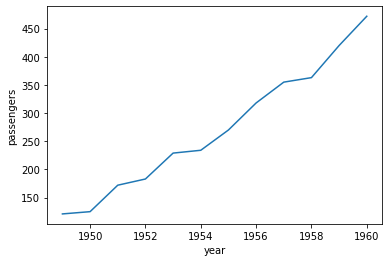

In [ ]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

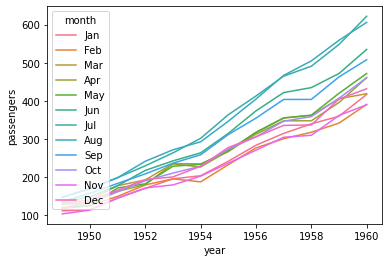

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

Build a [distplot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


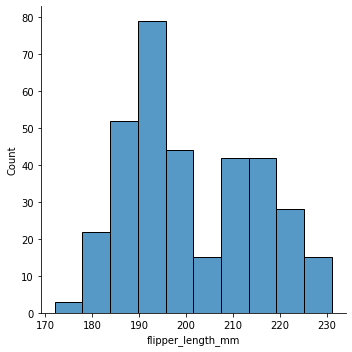

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm")

Build a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


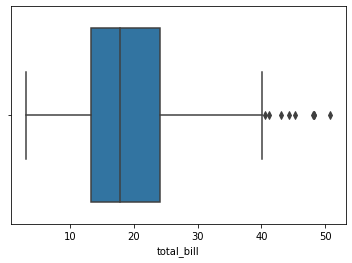

In [ ]:
ax = sns.boxplot(x=tips["total_bill"])

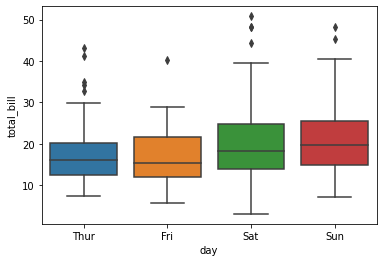

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

Load Titanic dataset

In [ ]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


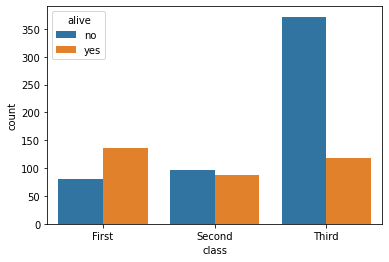

In [ ]:
#use countplot

sns.countplot(x="class", hue="alive", data=titanic)

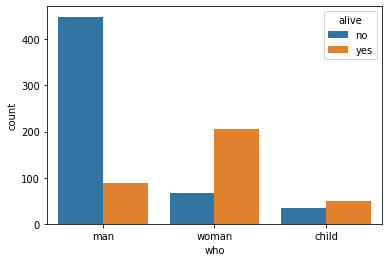

In [ ]:
#use countplot

sns.countplot(x="who", hue="alive", data=titanic)

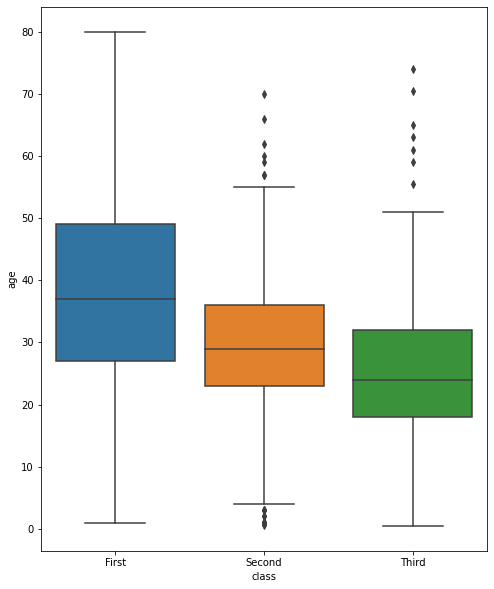

In [ ]:
#use boxplot
from matplotlib import pyplot as plt
plt.figure(figsize = (8, 10))

sns.boxplot(x = "class", y = "age", data = titanic)